In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### What is Abalone?
Abalone is a common name for a group of small to very large sea snails, marine gastropod mollusks in the family Haliotidae. 
These snails have a large, flattened, ear-shaped shell with a row of holes along the outer edge. 
The inner surface of the shell is iridescent and is highly prized for its beauty and used in jewelry and decorative items.

### About Dataset:
The Abalone dataset is a popular machine learning dataset that contains measurements of physical characteristics of abalone, a type of sea snail. The dataset is often used as a benchmark for regression tasks in machine learning.

The dataset includes the following features or variables for each abalone:

Sex: categorical variable (M for male, F for female, and I for infant)
The goal of the dataset is to predict the Gender of the abalone based on its physical characteristics. 
This is a Multi Class Classification task, as the target variable (sex) is a categorical variable.

Length: continuous variable representing the longest shell measurement in mm

Diameter: continuous variable representing the diameter of the shell in mm

Height: continuous variable representing the height of the shell in mm

Whole weight: continuous variable representing the weight of the whole abalone in grams

Shucked weight: continuous variable representing the weight of the meat in grams

Viscera weight: continuous variable representing the weight of the gut (after bleeding) in grams

Shell weight: continuous variable representing the weight of the shell in grams

Rings: integer variable representing the age of the abalone (the number of rings on the shell)

The dataset contains 4,177 instances and has been preprocessed to remove any missing values and to transform the categorical variable (sex) into a set of binary variables (one-hot encoding).



### Loading and Exploring the Dataset

The first step in any machine learning project is to load and explore the dataset.
In this project, we will load the Abalone dataset using Python's pandas library and explore its features using descriptive statistics.

In [ ]:
abalone = pd.read_csv('C:/Users/Ranesh/OneDrive/Desktop/Machine Leraning Projects/Abalone-Age-Prediction-Model-Using-Machine-Learning-main/Abalone-Age-Prediction-Model-Using-Machine-Learning-main/abalone.csv')

In [3]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Data Preprocessing

## Feature Selection and Transformation

Once the dataset is cleaned, we will select the relevant features for our model and transform them as necessary. 
This may involve converting categorical variables into numerical variables, scaling the data, or applying other transformations.

In [4]:
for col in abalone.columns:
    print('Unique values of ' + col)
    print(abalone[col].unique())
    print("======================")

Unique values of Sex
['M' 'F' 'I']
Unique values of Length
[0.455 0.35  0.53  0.44  0.33  0.425 0.545 0.475 0.55  0.525 0.43  0.49
 0.535 0.47  0.5   0.355 0.365 0.45  0.38  0.565 0.615 0.56  0.58  0.59
 0.605 0.575 0.68  0.665 0.705 0.465 0.54  0.24  0.205 0.21  0.39  0.46
 0.325 0.52  0.4   0.485 0.405 0.445 0.245 0.505 0.595 0.31  0.555 0.57
 0.6   0.62  0.625 0.695 0.36  0.51  0.435 0.495 0.385 0.515 0.37  0.27
 0.375 0.7   0.71  0.265 0.305 0.345 0.65  0.28  0.175 0.17  0.635 0.645
 0.61  0.725 0.235 0.315 0.225 0.64  0.63  0.585 0.42  0.335 0.415 0.275
 0.295 0.075 0.13  0.11  0.16  0.23  0.3   0.32  0.655 0.66  0.2   0.165
 0.19  0.74  0.34  0.675 0.745 0.685 0.69  0.67  0.29  0.26  0.395 0.41
 0.22  0.255 0.735 0.155 0.48  0.195 0.25  0.18  0.15  0.215 0.73  0.715
 0.765 0.185 0.285 0.72  0.75  0.755 0.78  0.815 0.14  0.77  0.775 0.76
 0.135 0.8  ]
Unique values of Diameter
[0.365 0.265 0.42  0.255 0.3   0.415 0.425 0.37  0.44  0.38  0.35  0.405
 0.355 0.4   0.28  0.34  0.295 0

In [5]:
abalone['Sex'] = abalone['Sex'].map({"M":'Male',"F":'Female',"I":'Infant'})

In [6]:
abalone.rename(columns = {'Whole weight':'Whole_weight','Shucked weight':'Shucked_weight','Viscera weight':'Viscera_weight','Shell weight':'Shell_weight'},inplace = True)

In [7]:
for col in abalone.columns:
    print('Unique values of ' + col)
    print(abalone[col].unique())
    print("======================")

Unique values of Sex
['Male' 'Female' 'Infant']
Unique values of Length
[0.455 0.35  0.53  0.44  0.33  0.425 0.545 0.475 0.55  0.525 0.43  0.49
 0.535 0.47  0.5   0.355 0.365 0.45  0.38  0.565 0.615 0.56  0.58  0.59
 0.605 0.575 0.68  0.665 0.705 0.465 0.54  0.24  0.205 0.21  0.39  0.46
 0.325 0.52  0.4   0.485 0.405 0.445 0.245 0.505 0.595 0.31  0.555 0.57
 0.6   0.62  0.625 0.695 0.36  0.51  0.435 0.495 0.385 0.515 0.37  0.27
 0.375 0.7   0.71  0.265 0.305 0.345 0.65  0.28  0.175 0.17  0.635 0.645
 0.61  0.725 0.235 0.315 0.225 0.64  0.63  0.585 0.42  0.335 0.415 0.275
 0.295 0.075 0.13  0.11  0.16  0.23  0.3   0.32  0.655 0.66  0.2   0.165
 0.19  0.74  0.34  0.675 0.745 0.685 0.69  0.67  0.29  0.26  0.395 0.41
 0.22  0.255 0.735 0.155 0.48  0.195 0.25  0.18  0.15  0.215 0.73  0.715
 0.765 0.185 0.285 0.72  0.75  0.755 0.78  0.815 0.14  0.77  0.775 0.76
 0.135 0.8  ]
Unique values of Diameter
[0.365 0.265 0.42  0.255 0.3   0.415 0.425 0.37  0.44  0.38  0.35  0.405
 0.355 0.4   0.28  

In [8]:
abalone.shape

(4177, 9)

### Data Cleaning and Handling Missing Values

After exploring the dataset, we will check for any missing values and handle them appropriately. 
We will also check for any outliers , duplicate values or anomalies in the data and remove or correct them as necessary.

In [9]:
# Checking Null Values
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [10]:
# Duplicate values checking
abalone.duplicated().sum()

0

In [11]:
abalone['Sex'].value_counts()

Sex
Male      1528
Infant    1342
Female    1307
Name: count, dtype: int64

In [12]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [13]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

## Data Visualization to Gain Insights

We will use various data visualization techniques to gain insights into the dataset and understand the relationships between the different features. 
This will help us select the appropriate machine learning algorithm for our model.

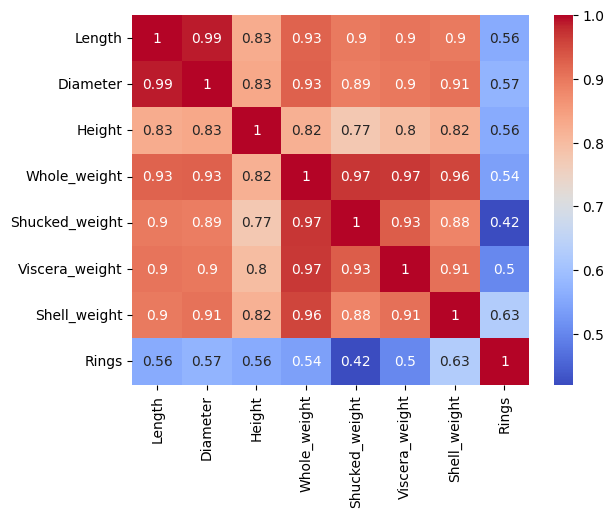

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

dataplot = sns.heatmap(abalone[['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']].corr(),cmap='coolwarm',annot=True)
plt.show()

<Axes: xlabel='Rings', ylabel='Count'>

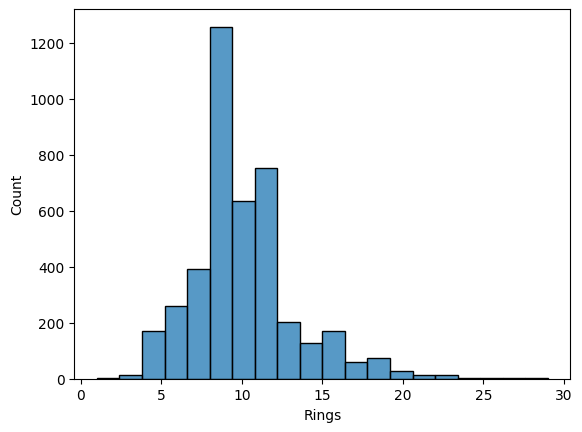

In [15]:
sns.histplot(abalone['Rings'],bins=20)

In [16]:
abalone.to_csv('abalone_data.csv')

In [17]:
abalone['Sex'].value_counts()

Sex
Male      1528
Infant    1342
Female    1307
Name: count, dtype: int64

In [31]:
#Converting the predictor variable in a binary numeric variable
abalone['Sex'].replace(to_replace='Male', value=1, inplace=True)
abalone['Sex'].replace(to_replace='Female',  value=0, inplace=True)
abalone['Sex'].replace(to_replace='Infant',  value=2, inplace=True)

In [33]:
abalone['Sex'].value_counts()

Sex
1    1528
2    1342
0    1307
Name: count, dtype: int64

### Model Development

## Splitting the Dataset into Training and Testing Sets

Before developing the machine learning model, we will split the dataset into training and testing sets. 
The training set will be used to train the model, while the testing set will be used to evaluate its performance.

In [32]:
X = abalone.drop('Sex',axis=1)
y = abalone['Sex']
X.shape,y.shape

((4177, 8), (4177,))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3341 entries, 4038 to 860
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3341 non-null   float64
 1   Diameter        3341 non-null   float64
 2   Height          3341 non-null   float64
 3   Whole_weight    3341 non-null   float64
 4   Shucked_weight  3341 non-null   float64
 5   Viscera_weight  3341 non-null   float64
 6   Shell_weight    3341 non-null   float64
 7   Rings           3341 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 234.9 KB


In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(handle_unknown='ignore',drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0,1,2,3,4,5,6,7])
        ],
        remainder='passthrough'
)

In [37]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', StandardScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7])])

In [38]:
X_train.head(5)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
4038,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,11
1272,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,8
3384,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7
3160,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035,7
3894,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215,12


In [39]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [40]:
X_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
4038,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,11
1272,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,8
3384,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7
3160,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035,7
3894,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215,12
...,...,...,...,...,...,...,...,...
3444,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9
466,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12
3092,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11
3772,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9


In [41]:
X_test

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
866,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325,9
1483,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245,8
599,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335,16
1702,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380,9
670,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215,14
...,...,...,...,...,...,...,...,...
3093,0.520,0.430,0.150,0.7280,0.3020,0.1575,0.235,11
1651,0.595,0.435,0.150,0.9000,0.4175,0.1700,0.265,8
2897,0.545,0.430,0.150,0.7420,0.3525,0.1580,0.208,10
3953,0.465,0.355,0.120,0.5805,0.2550,0.0915,0.184,8


In [42]:
X_train_dummy

array([[ 0.21017452,  0.36972535, -0.34795017, ..., -0.40512998,
        -0.21213236,  0.32909808],
       [-0.41944448, -0.5423862 , -0.93608206, ..., -0.82093157,
        -0.71241871, -0.60639542],
       [-1.84658088, -1.85988065, -1.64184034, ..., -1.34639511,
        -1.39137875, -0.91822659],
       ...,
       [-0.12562228, -0.13700329, -0.34795017, ..., -0.43254547,
        -0.36936522,  0.32909808],
       [ 0.42004752,  0.57241681, -0.46557654, ...,  0.34422673,
        -0.03345867, -0.29456425],
       [ 0.58794593,  0.67376253,  0.47543449, ...,  0.45845793,
         0.22383145, -1.23005776]])

In [43]:
X_test_dummy

array([[ 0.67189513,  0.47107108,  0.47543449, ...,  1.10272193,
         0.60976664, -0.29456425],
       [ 0.54597132,  0.31905249,  0.24018173, ...,  0.31224199,
         0.03801081, -0.60639542],
       [ 0.29412372,  0.36972535,  1.29881914, ...,  0.39905771,
         0.68123611,  1.88825393],
       ...,
       [ 0.16819992,  0.21770676,  0.24018173, ..., -0.20865231,
        -0.22642626,  0.01726692],
       [-0.50339368, -0.5423862 , -0.46557654, ..., -0.81636232,
        -0.39795301, -0.60639542],
       [-1.34288568, -1.35315201, -1.2889612 , ..., -1.30984112,
        -1.17697032, -0.91822659]])

## Selection of a Suitable Machine Learning Algorithm

There are many machine learning algorithms that can be used for Classification tasks. 
We will evaluate the performance of several algorithms and select the one that gives the best results.
We also make one table to comapre the results of diifferent models to gain insights into the model's performance.

In [44]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier() 
]

# Create a dictionary to store the results
results = {}

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_dummy, y_train)
    y_pred = clf.predict(X_test_dummy)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {accuracy}")
    
    # Classification report
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_dummy, y_train)
    y_pred = clf.predict(X_test_dummy)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    # Append results to DataFrame
    results_df = pd.concat([results_df,pd.DataFrame([{'Model': clf_name, 'Accuracy': accuracy, 'F1-Score': f1_score, 
                                    'Precision': precision, 'Recall': recall}])], ignore_index=True)

results_df

RandomForestClassifier Accuracy: 0.527511961722488
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.40      0.33      0.36       262
           1       0.44      0.48      0.46       307
           2       0.72      0.77      0.75       267

    accuracy                           0.53       836
   macro avg       0.52      0.53      0.52       836
weighted avg       0.52      0.53      0.52       836

Confusion Matrix for RandomForestClassifier:
[[ 87 142  33]
 [113 148  46]
 [ 18  43 206]]
AdaBoostClassifier Accuracy: 0.562200956937799
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.51      0.29      0.37       262
           1       0.50      0.57      0.53       307
           2       0.65      0.82      0.73       267

    accuracy                           0.56       836
   macro avg       0.55      0.56      0.54       836
weighted

,Model,Accuracy,F1-Score,Precision,Recall
0,RandomForestClassifier,0.545455,0.541349,0.538918,0.545455
1,AdaBoostClassifier,0.562201,0.542852,0.551840,0.562201
2,GradientBoostingClassifier,0.568182,0.557161,0.558128,0.568182
3,LogisticRegression,0.582536,0.568750,0.567153,0.582536
4,SVC,0.566986,0.549917,0.555519,0.566986
5,KNeighborsClassifier,0.534689,0.536940,0.539898,0.534689
6,DecisionTreeClassifier,0.502392,0.502109,0.501972,0.502392
7,GaussianNB,0.523923,0.476212,0.492628,0.523923
8,XGBClassifier,0.534689,0.533567,0.533792,0.534689


### Model Evaluation and Selection of Metrics

After training the model, we will evaluate its performance using appropriate metrics such as Accuracy,Classification Report, Confusion Matrix. 


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the LogisticRegression
lg_classifier = LogisticRegression()

# Train the Logistic Regression
lg_classifier.fit(X_train_dummy, y_train)

# Predict on the test set
y_pred_lg = lg_classifier.predict(X_test_dummy)

# Calculate accuracy
accuracy_lg = accuracy_score(y_test, y_pred_lg)
print("Logistic Regression Accuracy:", accuracy_lg)

# Classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lg))

# Confusion matrix
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lg))

Logistic Regression Accuracy: 0.5825358851674641
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43       262
           1       0.52      0.51      0.52       307
           2       0.68      0.87      0.76       267

    accuracy                           0.58       836
   macro avg       0.57      0.58      0.57       836
weighted avg       0.57      0.58      0.57       836

Confusion Matrix for Logistic Regression:
[[ 99 117  46]
 [ 89 157  61]
 [ 10  26 231]]


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3341 entries, 4038 to 860
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3341 non-null   float64
 1   Diameter        3341 non-null   float64
 2   Height          3341 non-null   float64
 3   Whole_weight    3341 non-null   float64
 4   Shucked_weight  3341 non-null   float64
 5   Viscera_weight  3341 non-null   float64
 6   Shell_weight    3341 non-null   float64
 7   Rings           3341 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 234.9 KB


### Model Deployment on a Website

## Building a Flask Web Application
To deploy the machine learning model on a website, we will use the Flask web framework. 
We will build a simple web application that allows users to enter the physical characteristics of an abalone and get a prediction of its gender.

### Creating an HTML Front-End
We will create an HTML front-end for our web application using Bootstrap and JavaScript. 
The front-end will provide a user-friendly interface for entering data and displaying the results.



In [47]:
import numpy as np

def predict(Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings):
    
    # Prepare features array
    features = np.array([[Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings]], dtype=object)
    
    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)
    
    # predict by model
    result =lg_classifier.predict(transformed_features).reshape(1, -1)
    
    return result[0]

In [49]:
# test 1
Length = 0.475          
Diameter = 0.350
Height = 0.115
Whole_weight = 0.4980     
Shucked_weight = 0.2375
Viscera_weight = 0.0990
Shell_weight = 0.1400
Rings = 7

result = predict(Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings)

if result == 0 :
    print("The Gender is Female")
elif result == 1 :
    print("The Gender is Male")
else: 
    print("The Gender is Infant")

The Gender is Infant


In [ ]:
# 2	0.475	0.350	0.115	0.4980	0.2375	0.0990	0.1400	7

In [50]:
# test 2
Length = 0.545         
Diameter = 0.440
Height = 0.175
Whole_weight = 0.7745    
Shucked_weight = 0.2985
Viscera_weight = 0.1875
Shell_weight = 0.2650
Rings = 11

result = predict(Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings)

if result == 0 :
    print("The Gender is Female")
elif result == 1 :
    print("The Gender is Male")
else: 
    print("The Gender is Infant")

The Gender is Female


In [51]:
# test 3
Length = 0.585        
Diameter = 0.475
Height = 0.120
Whole_weight = 0.9450   
Shucked_weight = 0.4100
Viscera_weight = 0.2115
Shell_weight = 0.2800
Rings = 14

result = predict(Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings)

if result == 0 :
    print("The Gender is Female")
elif result == 1 :
    print("The Gender is Male")
else: 
    print("The Gender is Infant")


The Gender is Male


In [52]:
import pickle
pickle.dump(lg_classifier,open('lg_classifier.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

### Summary of Results
In this project, we developed a machine learning model to predict the gender of abalone based on its physical characteristics. 
We preprocessed and analyzed the Abalone dataset, selected a suitable machine learning algorithm. 
We deployed the model on a website using Flask and HTML, providing a user-friendly interface for users to interact with the model.
